In [2]:
from plotly.offline import init_notebook_mode
import plotly.io as pio
import plotly.express as px
import pandas as pd
import numpy as np

init_notebook_mode(connected=True)
pio.renderers.default = "plotly_mimetype+notebook"

In [38]:
file_path = r"avia_gooc_page_spreadsheet.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=10, index_col=0)
df.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
df = df.drop(df.index[0:3])
print(df)


                             2013       2014       2015       2016       2017  \
TIME                                                                            
Belgium                  957012.2  1014585.6  1126234.1    1088734    1251173   
Bulgaria                  19574.9    23072.8      31520    32976.9    34806.7   
Czechia                     58147      58312      58445      77704    89278.5   
Denmark                    148980     208590     210570     200133     235937   
Germany                 4231473.9    4336163    4325665    4467022    4773359   
Estonia                     20862      19432      16034      13868    11232.9   
Ireland                  127422.8   138202.9   148713.5   145768.7   163123.2   
Greece                    67262.4    60324.4    62331.9    69949.5    69073.6   
Spain                      580847     593902     594393     639237   742442.5   
France                  1741020.6  2361510.1  2380931.3    2401593  2450326.1   
Croatia                     

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [40]:
print(df.columns)
print(df.index)

Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object')
Index(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy', 'Cyprus',
       'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Iceland', 'Norway', 'Switzerland',
       'United Kingdom', 'Bosnia and Herzegovina', 'Montenegro',
       'North Macedonia', 'Serbia', 'Türkiye'],
      dtype='object', name='TIME')


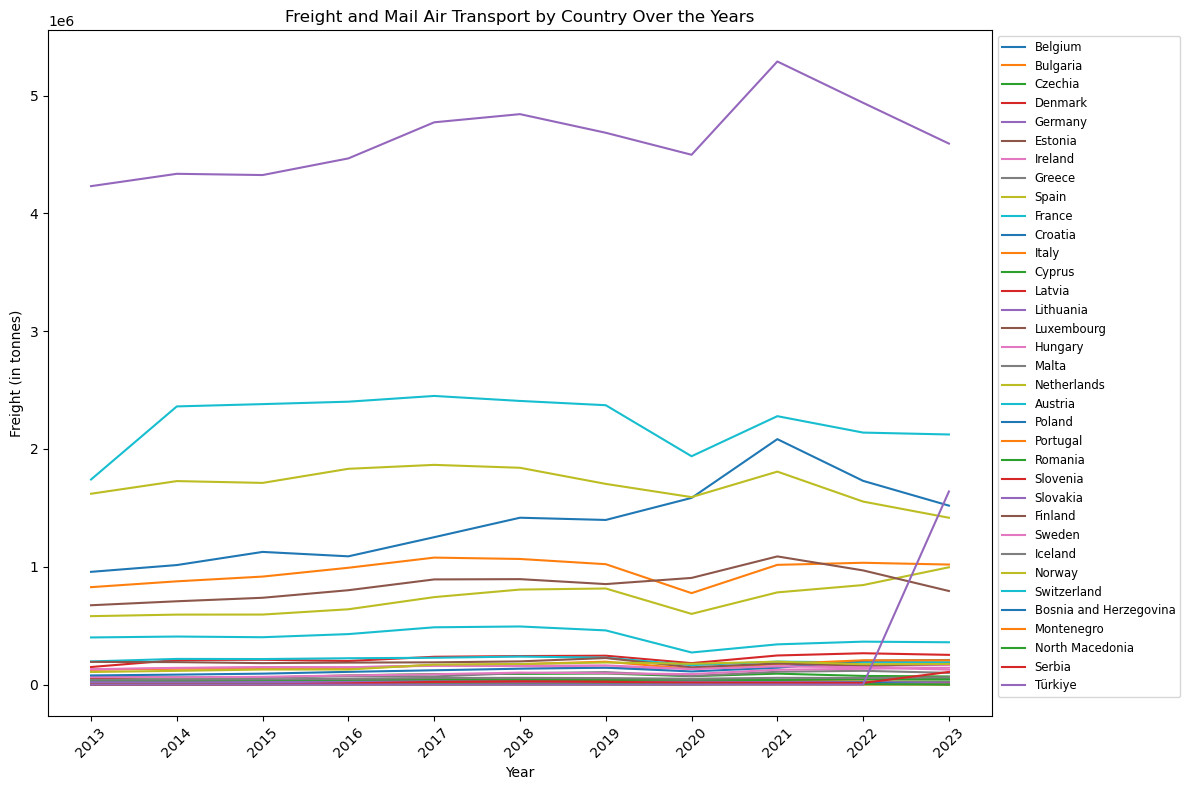

In [42]:
import matplotlib.pyplot as plt


df.fillna(0, inplace=True)  
x = df.columns  
y_labels = df.index  


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    if (country == "United Kingdom"): continue
    y_values = df.loc[country].values 
    for i in range(0, len(y_values)):
        if (y_values[i] == ":"):
            y_values[i] = 0
    ax.plot(x, y_values, label=country)


ax.set_title("Freight and Mail Air Transport by Country Over the Years")
ax.set_xlabel("Year")
ax.set_ylabel("Freight (in tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
file_path = r"avia_gooc_page_spreadsheet (5countries).xlsx"
df_actual = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=10, index_col=0)
df_actual.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df_actual)

                  2013       2014       2015       2016       2017       2018  \
TIME                                                                            
Belgium       957012.2  1014585.6  1126234.1  1088734.0  1251173.0  1416428.0   
Germany      4231473.9  4336163.0  4325665.0  4467022.0  4773359.0  4842716.0   
France       1741020.6  2361510.1  2380931.3  2401593.0  2450326.1  2407878.2   
Netherlands  1620037.6  1727454.8  1712031.3  1831791.8  1865105.5  1840418.8   
Italy           826981   876495.0   916755.0   991688.0  1077874.0  1066221.0   

                  2019       2020       2021       2022       2023  
TIME                                                                
Belgium      1397513.0  1584640.0  2083632.0  1729332.0  1519106.0  
Germany      4684570.8  4497805.1  5289724.0  4938859.1  4592645.6  
France       2371614.1  1938349.0  2278630.1  2139178.3  2123148.6  
Netherlands  1703556.1  1591388.6  1807924.4  1553481.8  1416215.3  
Italy        10219

C:\Users\User\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [46]:
print(df.columns)
print(df.index)

Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object')
Index(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy', 'Cyprus',
       'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Iceland', 'Norway', 'Switzerland',
       'United Kingdom', 'Bosnia and Herzegovina', 'Montenegro',
       'North Macedonia', 'Serbia', 'Türkiye'],
      dtype='object', name='TIME')


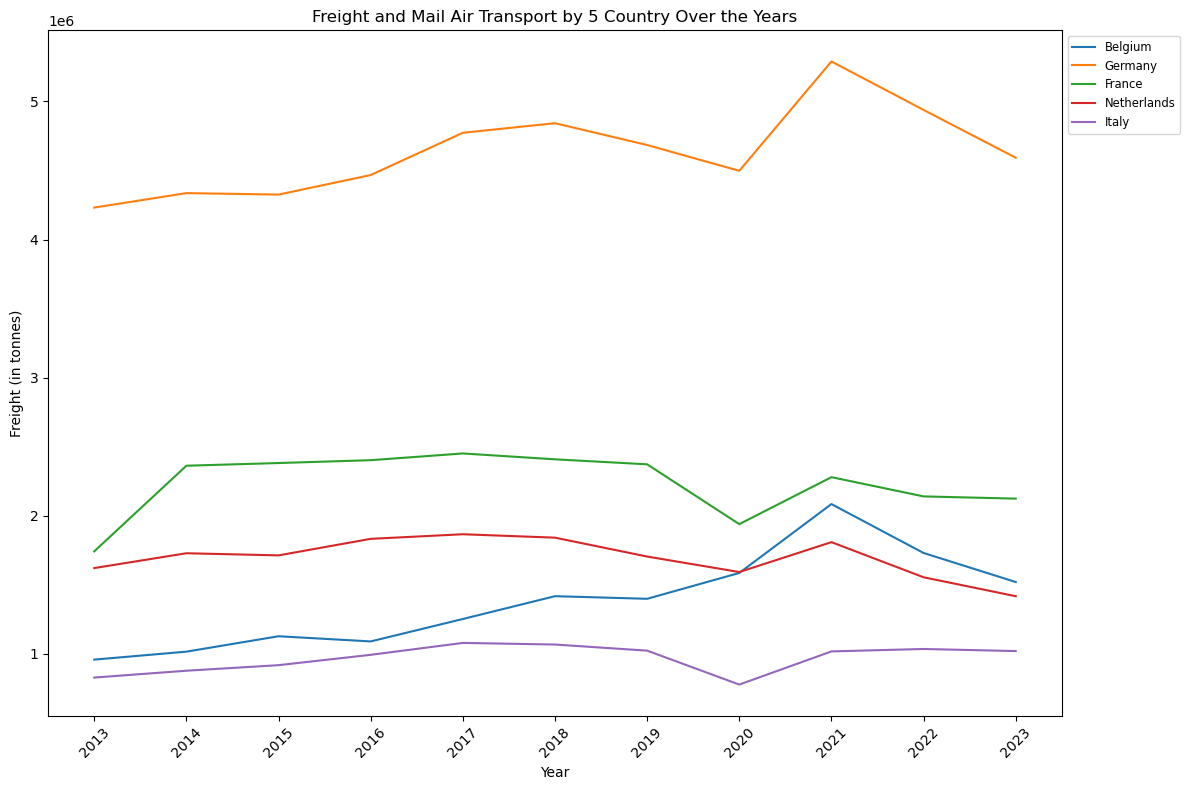

In [4]:
import matplotlib.pyplot as plt


df_actual.fillna(0, inplace=True)  
x = df_actual.columns  
y_labels = df_actual.index  


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    y_values = df_actual.loc[country].values 
    for i in range(0, len(y_values)):
        if (y_values[i] == ":"):
            y_values[i] = 0
    ax.plot(x, y_values, label=country)


ax.set_title("Freight and Mail Air Transport by 5 Country Over the Years")
ax.set_xlabel("Year")
ax.set_ylabel("Freight (in tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Graph 2: Freight and Mail Air Transport by Five Countries Over the Years**

Among all countries, we picked five countries that are crucial in European logisics or have notable long-term growth to deeply analyze.

The graph above shows that the changes on freight and mail air transport in Belgium, Germany, France, Netherlands, and Italy from 2013 to 2023. In most of five countries, a decreased trend had been found in 2020, when the covid outbreak. Specifically, France had the most significant drop, while Belgruim and Netherlands saw a small increase.

Among these countries, Netherlands's air freight was not significantly affected, indicating that it has a relatively stable air transport. While Belgium's air freight also increased slightly, Germany experienced the fastest recovery in 2021. Besides, Germany even reached its peak over past ten years and gradually decreased after then. 

Overall, the long-term trends in these countries are different. Germany recovered quickly after the covid outbreak, although its growth declined afterward. Belguim's growth has steadily increased, and Netherlands's growth maintained stable during the pandemic.

In [5]:
file_path = r"avia_goincc_page_spreadsheet.xlsx"
df_intraeu = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=9, index_col=0)
df_intraeu.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df_intraeu)

              2018-Q1   2018-Q2   2018-Q3   2018-Q4   2019-Q1   2019-Q2  \
TIME                                                                      
Belgium         82510   87402.0   87429.0   82495.0   77597.0   82147.0   
Germany        227691  232631.0  217166.0  239209.0  222887.4  226274.4   
Italy           64252   70344.0   62750.0   68234.0   59357.0   64335.0   
Netherlands   13407.1   13778.1   12753.8   14476.0   14328.6   14060.5   
France       104423.9  108247.1   98472.6  116019.8  113108.8  113747.8   

              2019-Q3   2019-Q4   2020-Q1   2020-Q2   2020-Q3   2020-Q4  \
TIME                                                                      
Belgium       79818.0   86013.0   76958.0   71194.0   88415.0   97570.0   
Germany      220484.3  238120.2  211696.3  200809.1  227920.5  261307.1   
Italy         63627.0   74414.0   62850.0   53269.0   65015.0   78770.0   
Netherlands   15403.1   18764.3   16170.7    9199.6   11502.2   11217.6   
France       112286.3  1

C:\Users\User\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



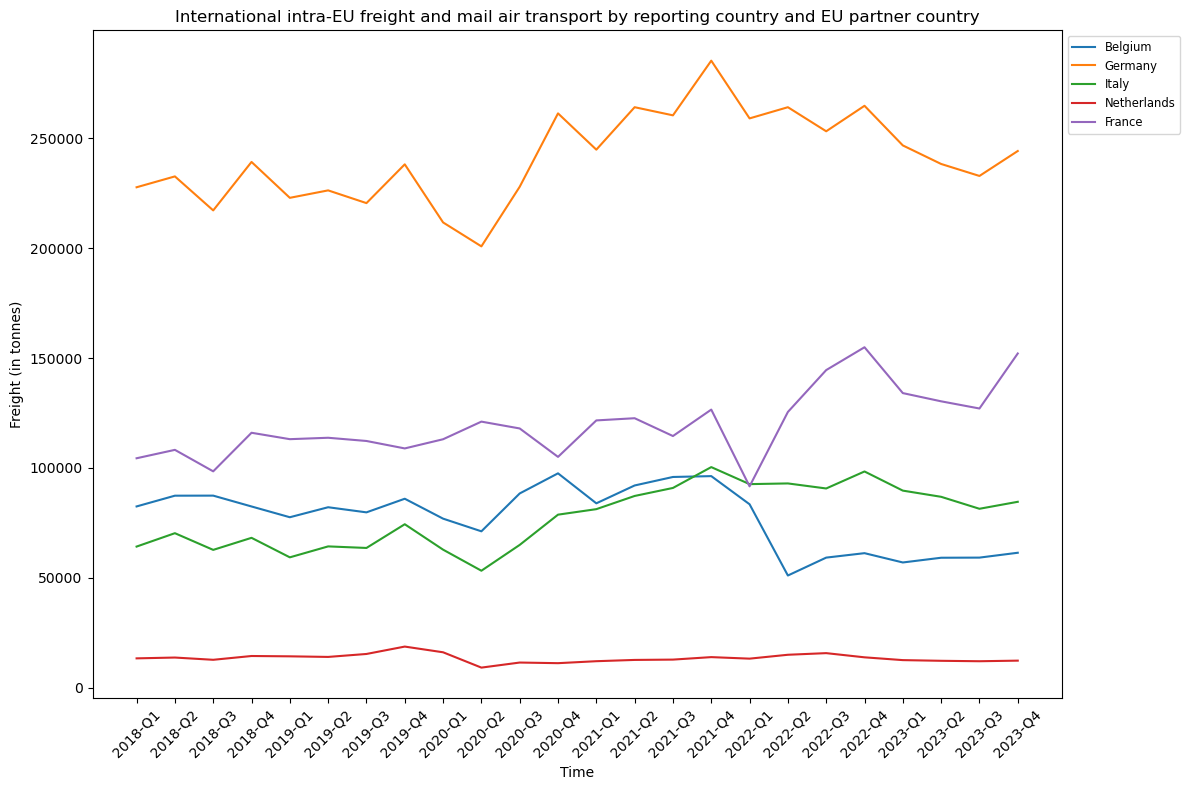

In [6]:
import matplotlib.pyplot as plt


df_intraeu.fillna(0, inplace=True)  
x = df_intraeu.columns[0:-2]  
y_labels = df_intraeu.index


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    y_values = df_intraeu.loc[country].values[0:-2] 
    for i in range(0, len(y_values)):
        if (y_values[i] == ":"):
            y_values[i] = 0
    ax.plot(x, y_values, label=country)


ax.set_title("International intra-EU freight and mail air transport by reporting country and EU partner country")
ax.set_xlabel("Time")
ax.set_ylabel("Freight (in tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Graph 3: Trends in International Intra-EU Freight and Mail Air Transport (2018-2023): A Comparative Analysis by Country**

For intra-EU, except for Germany, other countries were not significantly affected by covid-19 outbreak at the end of 2019. Especially, Netherlands has been stable over past 10 years, 

Notably, at the end of 2021, the air freight of Netherlands, Belgium and France also experienced a larger drop than 2019.
#check the relatable research paper

In [54]:
file_path = r"avia_goexcc_page_spreadsheet.xlsx"
df_extraeu = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=9, index_col=0)
df_extraeu.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df_extraeu)

              2018-Q1   2018-Q2   2018-Q3   2018-Q4   2019-Q1   2019-Q2  \
TIME                                                                      
Belgium        252305  283463.0  268940.0  271661.0  251385.0  235845.0   
Germany        917174  955238.0  935424.0  987187.0  893838.1  911854.9   
France       424153.3  447476.0  445362.9  476781.4  431853.3  433495.7   
Italy          175891  196492.0  188485.0  190046.0  162586.0  183893.0   
Netherlands    428910  438921.7  451616.0  465788.5  405717.9  405950.6   

              2019-Q3   2019-Q4   2020-Q1   2020-Q2   2020-Q3   2020-Q4  \
TIME                                                                      
Belgium      254341.0  330009.0  251061.0  291513.0  323295.0  384528.0   
Germany      898433.0  945656.3  821575.4  810834.5  847428.7  986344.2   
France       426298.1  432303.8  436101.3  245226.7  298407.6  349894.5   
Italy        174564.0  188116.0  127543.0   90758.0  108417.0  141656.0   
Netherlands  403284.5  4

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



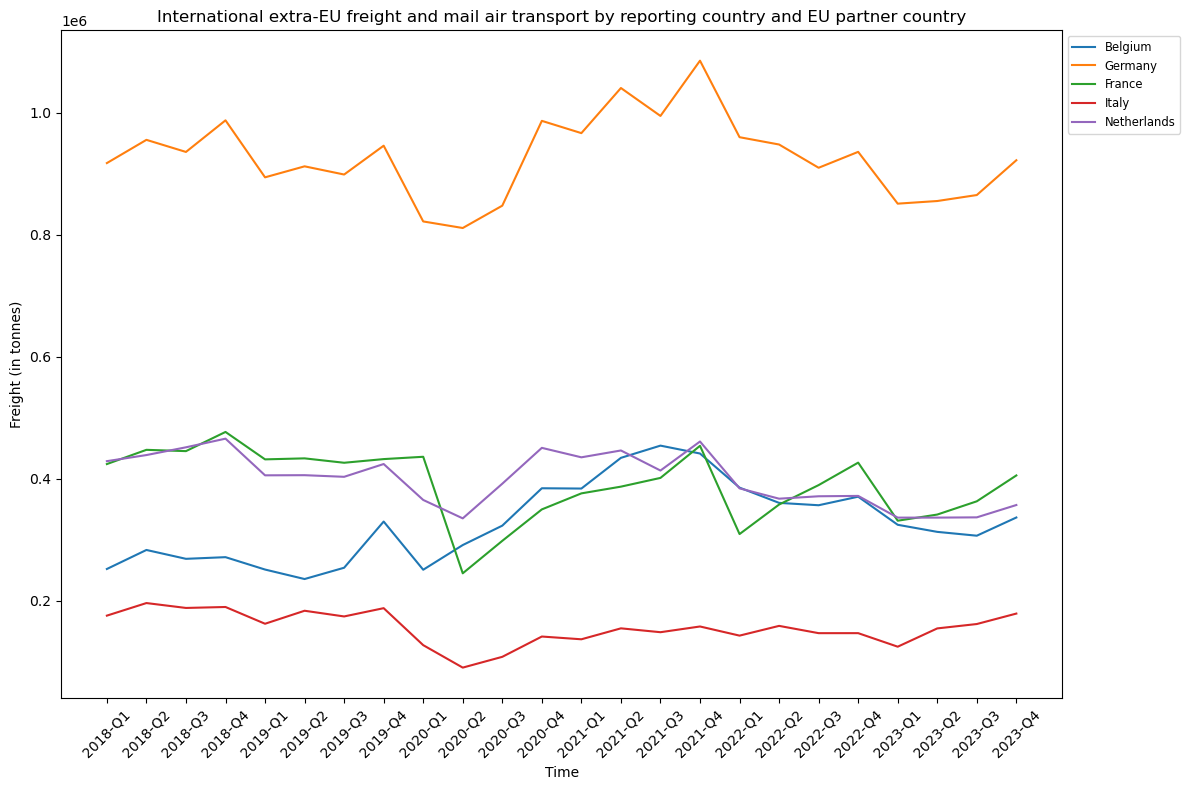

In [56]:
import matplotlib.pyplot as plt


df_extraeu.fillna(0, inplace=True)  
x = df_extraeu.columns
y_labels = df_extraeu.index


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    y_values = df_extraeu.loc[country].values
    for i in range(0, len(y_values)):
        if (y_values[i] == ":"):
            y_values[i] = 0
    ax.plot(x, y_values, label=country)


ax.set_title("International extra-EU freight and mail air transport by reporting country and EU partner country")
ax.set_xlabel("Time")
ax.set_ylabel("Freight (in tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Graph 3:International extra-EU freight and mail air transport by reporting country and EU partner country**

The graph above shows the changes in international extra-EU freight and mail air transport by Belgium, Germany, France, Netherlands, and Italy from 2018-Q1 to 2023-Q4. Except Belguim, other four countries had a drop fro 2020-Q1 to 2020-Q2. Among these 

For extra-EU trade, except for Belguim, the air freight of the other four countries all showed a decline from 2019-Q4 to 2020-Q2 because of the covid-19 outbreak. France had the largest drop in this period, but it was almost not affected in 2019. In 2020-Q2, all countries' freight started to increase. Germany's recovery was relatively slowly compared to other countries, and a substantial rebound happened until Q3 of that year.

Overall, Germany's air freight was the relatively unstable during the pandemic, experiencing large flunctuations often. 

In [14]:
file_path = r"C:\Users\User\Downloads\mar_qg_qm_cwh_page_spreadsheet (2).xlsx"
df_m = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=7, index_col=0)
df_m.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df_m)

            2019-Q1   2019-Q2   2019-Q3   2019-Q4   2020-Q1   2020-Q2  \
TIME                                                                    
France        75818   74586.0   74000.0   71112.0   70550.0   64278.0   
Belgium       65729   73351.0   68355.0   70347.0   71681.0   63735.0   
Germany       74212   76593.0   73358.0   70370.0   70686.0   65056.0   
Netherlands  159216  152031.0  148335.0  147943.0  143396.0  135462.0   
Italy        118479  137414.0  119508.0  123792.0  111693.0  117519.0   

              2020-Q3   2020-Q4   2021-Q1   2021-Q2   2021-Q3   2021-Q4  \
TIME                                                                      
France        66314.0   67382.0   65587.0   65372.0   67512.0   72619.0   
Belgium       64615.0   68644.0   70851.0   74587.0   70255.0   73135.0   
Germany       67672.0   72317.0   71217.0   71389.0   72517.0   74006.0   
Netherlands  128312.0  140588.0  142770.0  144889.0  146012.0  146508.0   
Italy        116863.0  113761.0  11297

C:\Users\User\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



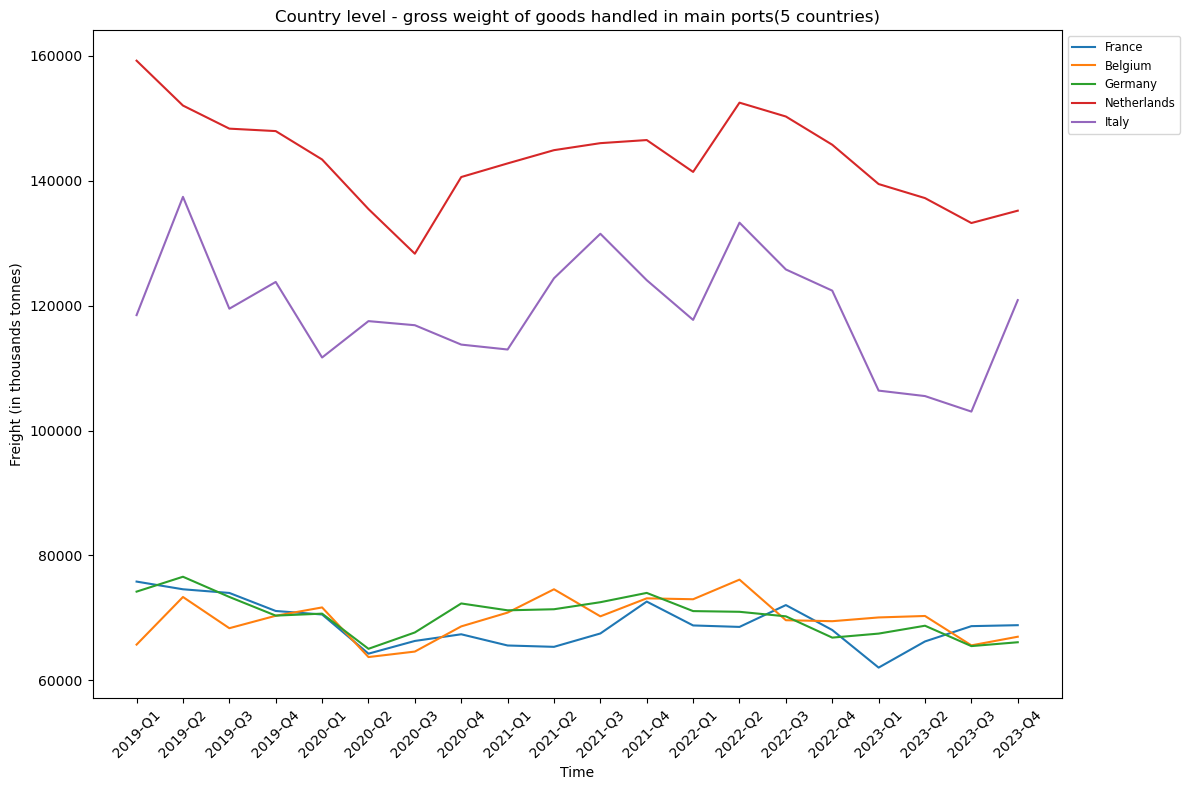

In [15]:
import matplotlib.pyplot as plt


df_m.fillna(0, inplace=True)  
x = df_m.columns
y_labels = df_m.index


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    y_values = df_m.loc[country].values
    ax.plot(x, y_values, label=country)


ax.set_title("Country level - gross weight of goods handled in main ports(5 countries)")
ax.set_xlabel("Time")
ax.set_ylabel("Freight (in thousands tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Graph 5: gross weight of goods handled in main ports in five countries**

The graph ablove shows the change in gross weight of goods handled in main ports in five countries. At the end of 2019, most countries had a drop in marine freight. According to the graph, Netherlands plays an important role in global marine transporation, having the largest gross weight of goods over past 5 years. It also had the most signigicant decline from 2019-Q4 to 2020-Q3.

Besides, according the last graph, Italy had the smallest air freight volume, but its marine transportation was the second highest in these five countries. It is worth noting that Italy's marine transporation experienced larger decline in 2023 compared to the pandemic period.

In [3]:
file_path = r"C:\Users\User\Downloads\mar_qg_qm_cwh_page_spreadsheet(all countries).xlsx"
df_m_all = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=7, index_col=0)
df_m_all.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df_m_all)

                                          2019-Q1   2019-Q2   2019-Q3  \
TIME                                                                    
European Union - 27 countries (from 2020)  879106  910366.0  876520.0   
Belgium                                     65729   73351.0   68355.0   
Bulgaria                                     7152    6989.0    8678.0   
Denmark                                     21068   20554.0   20162.0   
Germany                                     74212   76593.0   73358.0   
Estonia                                      7950    9009.0    8100.0   
Ireland                                     13250   12342.0   12409.0   
Greece                                      42286   46952.0   46654.0   
Spain                                      123185  127014.0  126541.0   
France                                      75818   74586.0   74000.0   
Croatia                                      4264    4751.0    4717.0   
Italy                                      118479  

C:\Users\User\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



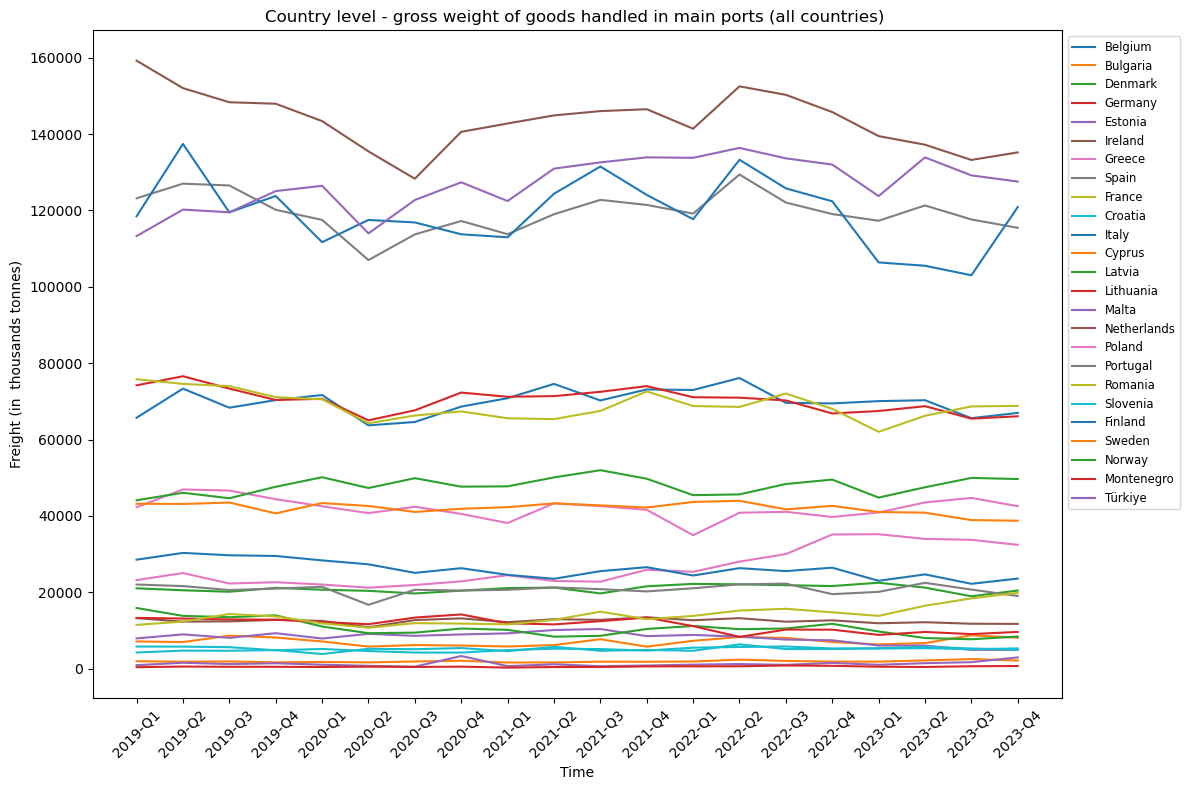

In [12]:
import matplotlib.pyplot as plt


df_m_all.fillna(0, inplace=True)  
x = df_m_all.columns  
y_labels = df_m_all.index  


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    if (country == "United Kingdom"): continue
    y_values = df_m_all.loc[country].values 
    for i in range(0, len(y_values)):
        if (y_values[i] == ":"):
            y_values[i] = 0
    ax.plot(x, y_values, label=country)


ax.set_title("Country level - gross weight of goods handled in main ports (all countries) ")
ax.set_xlabel("Time")
ax.set_ylabel("Freight (in  thousands tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()